[Cat and Dog Dataset in Kaggle](https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset)

In [1]:
import json
import os

with open('/content/drive/MyDrive/kaggle.json', 'r') as f:
    kaggle_api_key = json.load(f)

os.environ['KAGGLE_USERNAME'] = kaggle_api_key['username']
os.environ['KAGGLE_KEY'] = kaggle_api_key['key']

In [2]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

100% 786M/788M [00:04<00:00, 199MB/s]
100% 788M/788M [00:04<00:00, 188MB/s]


In [3]:
!unzip microsoft-catsvsdogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

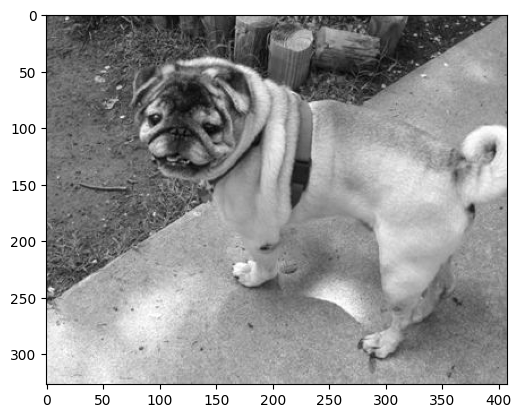

In [11]:
DIR_PATH = '/content/PetImages'
CATEGORIES = ['Dog', 'Cat']
for category in CATEGORIES:
  path = os.path.join(DIR_PATH, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break

In [18]:
IMG_SIZE = 50
 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

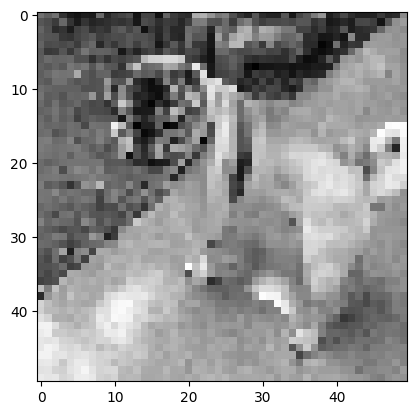

In [19]:
plt.imshow(new_array, cmap='gray')
plt.show()

In [20]:
trainin_data = []
def create_train_data():
  for category in CATEGORIES:
    path = os.path.join(DIR_PATH, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        trainin_data.append([new_array, class_num])
      except Exception as e:
        pass

create_train_data()

In [21]:
print(len(trainin_data))
trainin_data[0]

24946


[array([[116, 100, 117, ...,  46,  51, 140],
        [ 91,  83,  66, ...,  91, 145, 158],
        [104,  87,  52, ..., 146, 150, 142],
        ...,
        [227, 229, 221, ..., 136, 151, 133],
        [221, 223, 208, ..., 143, 133, 156],
        [230, 225, 227, ..., 144, 151, 147]], dtype=uint8),
 0]

In [23]:
import random

In [25]:
random.shuffle(trainin_data)

In [27]:
for sample in trainin_data[:10]:
  print(sample[1])


1
1
1
1
1
0
1
0
1
1


In [80]:
X = []
y = []

In [81]:
for features, label in trainin_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [82]:
X = X / 255.0

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

In [85]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [86]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [89]:
import time
NAME = f'Cats-vs-dog-cnn-64x2-{int(time.time())}'
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=f'logs/{NAME}')

In [90]:
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3, callbacks=[tensorboard])

Epoch 1/3
546/546 [==============================] - 128s 234ms/step - loss: 0.4751 - accuracy: 0.7766 - val_loss: 0.4725 - val_accuracy: 0.7690
Epoch 2/3
546/546 [==============================] - 114s 208ms/step - loss: 0.4451 - accuracy: 0.7953 - val_loss: 0.4634 - val_accuracy: 0.7877
Epoch 3/3
546/546 [==============================] - 124s 227ms/step - loss: 0.4261 - accuracy: 0.8033 - val_loss: 0.4615 - val_accuracy: 0.7921


In [91]:
!tensorboard --logdir='logs/'

2023-05-09 20:02:15.050363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.12.2 at http://localhost:6006/ (Press CTRL+C to quit)
Exception ignored in atexit ca

I can't see that page(I'm working on colab), but you'll see something like that

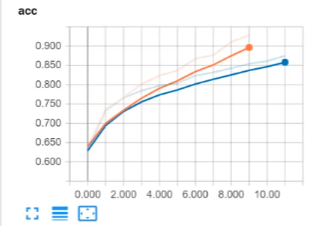

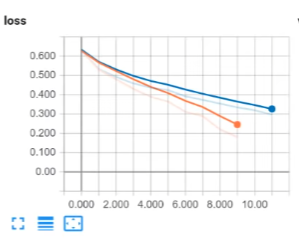

Actually I found this code


```
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('tensorboard --logdir /content/logs/Cats-vs-dog-cnn-64x2-1683659854/train --host 0.0.0.0 --port 6006 &')

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
 "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
```

but you need a create account so I didn't bother